### PROJET PYTHON : DETECTION DE COMMUNAUTES DANS LES RESEAUX SOCIAUX.

##### Importation des bibliothèques nécessaires

In [40]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import random
import community


##### Chargement des Donneès, Dataset du Facebook

In [4]:
file_path = r'C:\Users\User\Downloads\SD_MASTER\S1\Python\dataset_facebook.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Creer le graphe
G = nx.from_pandas_edgelist(df, 0, 1, create_using=nx.Graph())

# Statistique du réseau
print(df)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

          0     1
0         0     1
1         0     2
2         0     3
3         0     4
4         0     5
...     ...   ...
88229  4026  4030
88230  4027  4031
88231  4027  4032
88232  4027  4038
88233  4031  4038

[88234 rows x 2 columns]
Number of nodes: 4039
Number of edges: 88234


##### Visualisation du réseau avec matplotlib

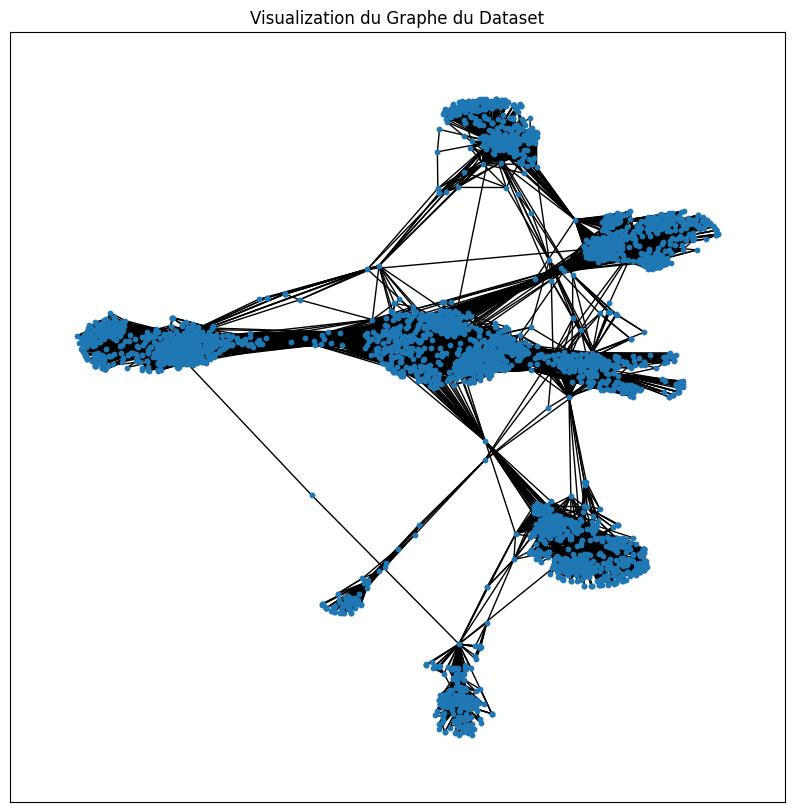

In [5]:

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42, iterations=100)  # Utiliser spring_layout pour un meilleur espacement
nx.draw_networkx(G, pos, with_labels=False, font_weight='bold', node_size=10)
plt.title('Visualization du Graphe du Dataset')
plt.show()


#### APPLICATION DE K-MEANS SUR LES DONNES ENTIER

In [6]:
# Extraction des caractéristiques des nœuds
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

In [25]:
# Identification du neoud influent
most_influential_node = max(betweenness_centrality, key=betweenness_centrality.get)
print(f"Neoud Influent dans le Dataset: {most_influential_node}")

Neoud Influent dans le Dataset: 0


In [8]:
# Création d'un DataFrame avec les caractéristiques des nœuds
features_df = pd.DataFrame({
    'Node': G.nodes(),
    'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Closeness Centrality': [closeness_centrality[node] for node in G.nodes()]
})

print(features_df)

      Node  Degree Centrality  Betweenness Centrality  Closeness Centrality
0        0           0.085934            1.463059e-01              0.353343
1        1           0.004210            2.783274e-06              0.261376
2        2           0.002476            7.595021e-08              0.261258
3        3           0.004210            1.685066e-06              0.261376
4        4           0.002476            1.840332e-07              0.261258
...    ...                ...                     ...                   ...
4034  4034           0.000495            0.000000e+00              0.183989
4035  4035           0.000248            0.000000e+00              0.183980
4036  4036           0.000495            0.000000e+00              0.183989
4037  4037           0.000991            7.156847e-08              0.184005
4038  4038           0.002229            6.338922e-07              0.184047

[4039 rows x 4 columns]


In [9]:
# Normalisation des caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df.drop('Node', axis=1))

In [10]:
# Application de l'algorithme de clustering (K-means)
kmeans = KMeans(n_clusters=5, random_state=50)
clusters = kmeans.fit_predict(scaled_features)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


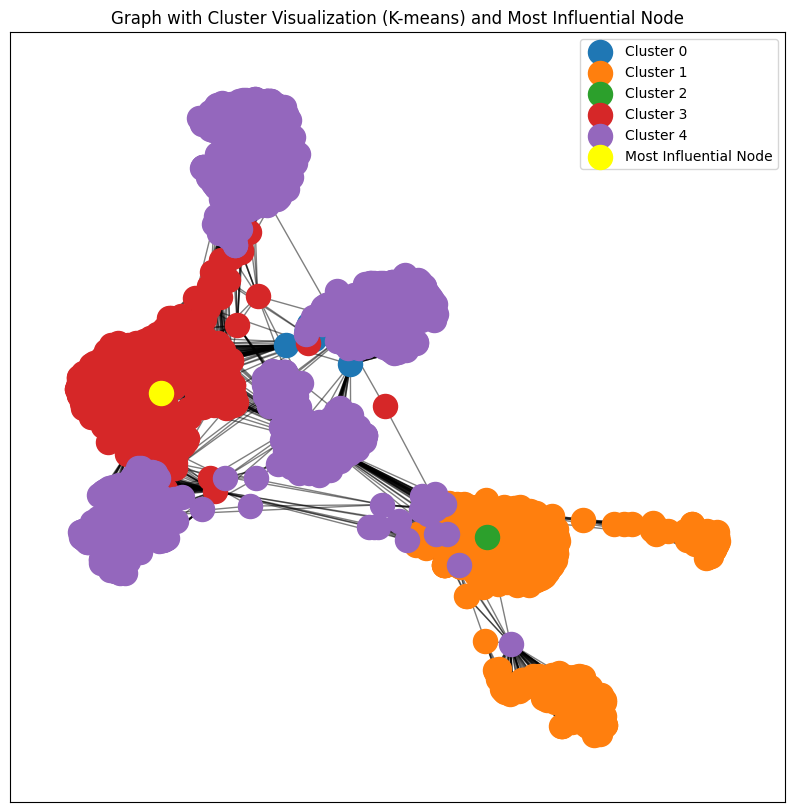

In [11]:
# Ajout de l'information de cluster au DataFrame
features_df['Cluster'] = clusters

# Visualisation du graphe
plt.figure(figsize=(10, 10))
pos = pos = nx.spring_layout(G)

# Dessiner les nœuds du cluster en utilisant une couleur différente
for cluster_num in range(max(clusters) + 1):
    nodes_in_cluster = features_df[features_df['Cluster'] == cluster_num]['Node']
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_in_cluster, node_color=f'C{cluster_num}', label=f'Cluster {cluster_num}')

# Dessiner le nœud le plus influent en rouge
nx.draw_networkx_nodes(G, pos, nodelist=[most_influential_node], node_color='yellow', label='Most Influential Node')

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Graph with Cluster Visualization (K-means) and Most Influential Node')
plt.legend()
plt.show()

#### APPLICATION DE K-MEANS SUR UNE PARTIE DES DONNEES:

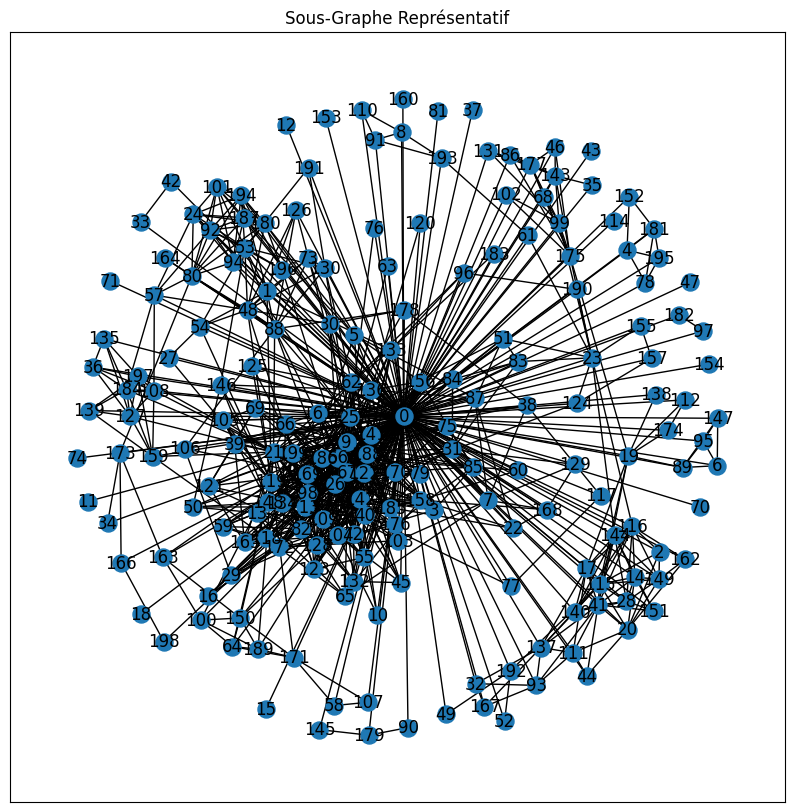

Number of nodes: 200
Number of edges: 962


In [34]:
# Choisir un nombre aléatoire de nœuds pour le sous-graphe
num_nodes_subgraph = 200  
# Sélection de sous-graphe aléatoire
random_nodes = list(G.nodes())[:num_nodes_subgraph]
subgraph = G.subgraph(random_nodes)


# Visualisation le sous-graphe
plt.figure(figsize=(10, 10))
pos_subgraph = nx.spring_layout(subgraph, seed=42, iterations=100)
nx.draw_networkx(subgraph, pos_subgraph, with_labels=True, font_weight='light', node_size=150)
plt.title('Sous-Graphe Représentatif')
plt.show()

print(f"Number of nodes: {subgraph.number_of_nodes()}")
print(f"Number of edges: {subgraph.number_of_edges()}")

# Spécifier le chemin complet du fichier GEXF, y compris le dossier
#gexf_file_path = '/Users/pro/Desktop/ProjetPython/Graph.gexf'

# Sauvegarder le graphe au format GEXF dans le dossier spécifié
#nx.write_gexf(subgraph, gexf_file_path)


In [35]:
# Extraction des caractéristiques des nœuds
degree_centralitysub = nx.degree_centrality(subgraph)
betweenness_centralitysub = nx.betweenness_centrality(subgraph)
closeness_centralitysub = nx.closeness_centrality(subgraph)

# Ajout d'une mesure de centralité pour identifier le nœud le plus influent
eigenvector_centralitysub = nx.eigenvector_centrality(subgraph)

In [36]:
# Création d'un DataFrame pour les caractéristiques
features_df_sub = pd.DataFrame({
    'degree_centrality': list(degree_centralitysub.values()),
    'betweenness_centrality': list(betweenness_centralitysub.values()),
    'closeness_centrality': list(closeness_centralitysub.values()),
    'eigenvector_centrality': list(eigenvector_centralitysub.values())
})
print(features_df_sub)

# Identification du nœud le plus influent
influential_node = max(eigenvector_centralitysub, key=eigenvector_centrality.get)
print(f"Le nœud le plus influent est : {influential_node}")

     degree_centrality  betweenness_centrality  closeness_centrality  \
0             1.000000                0.871386              1.000000   
1             0.055276                0.000561              0.514212   
2             0.025126                0.000007              0.506361   
3             0.055276                0.000086              0.514212   
4             0.025126                0.000034              0.506361   
..                 ...                     ...                   ...   
195           0.020101                0.000000              0.505076   
196           0.030151                0.000102              0.507653   
197           0.045226                0.000102              0.511568   
198           0.010050                0.000000              0.502525   
199           0.110553                0.000895              0.529255   

     eigenvector_centrality  
0                  0.406123  
1                  0.040547  
2                  0.022471  
3              

In [37]:
# Normalisation des caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df_sub)


In [38]:
# Détermination du nombre de clusters
num_clusters = 4
# Application de KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Convertir les indices des clusters KMeans en un dictionnaire
kmeans_cluster_dict = {node: cluster for node, cluster in zip(subgraph.nodes(), clusters)}

# Ajout des informations de clustering au sous-graphe
for node, cluster in zip(subgraph.nodes(), clusters):
    subgraph.nodes[node]['kmeans_cluster'] = cluster

print(clusters)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 0 0 2 0 0 0 0 0 3 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 3 3 0 0 0 0 2 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 0 0 0 0 2 0 0 0 2 3 0 0 0 0 2 0
 0 0 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 2 0 0 0 0 2 0
 0 0 3 0 0 0 0 2 3 0 0 3 2 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 2 3 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 3 3 0 2 0 0 0 2 0 0 0 0 0 0 0 0
 2 3 0 3 0 0 0 0 0 0 0 0 0 0 3]


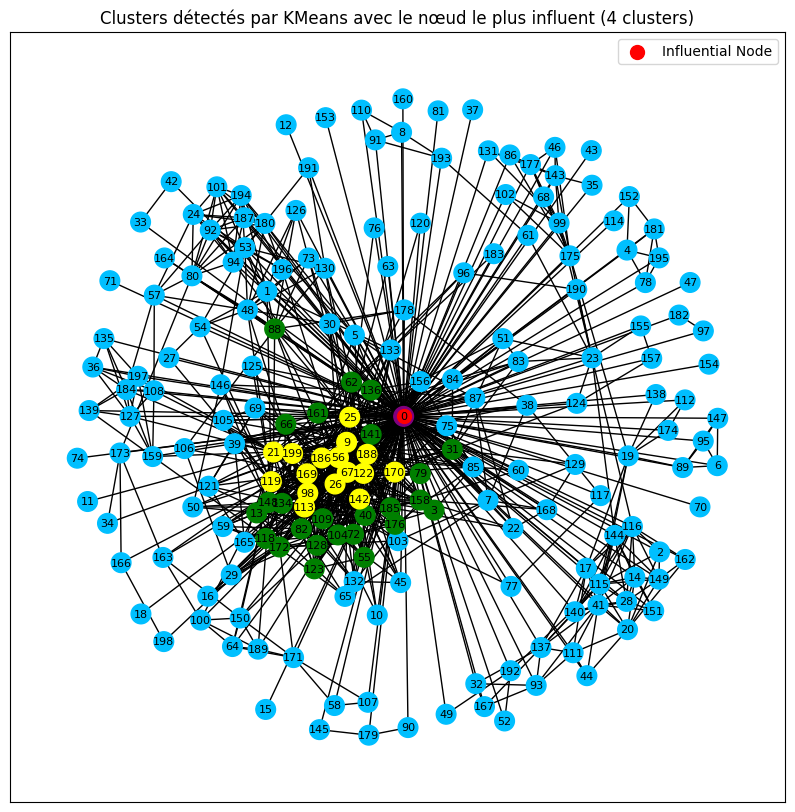

In [39]:
# Visualisation du sous-graphe avec des couleurs spécifiées
plt.figure(figsize=(10, 10))
pos_subgraph = nx.spring_layout(subgraph, seed=42, iterations=100)

# Définir manuellement les couleurs de clusters et du nœud influent
cluster_colors = {0: 'deepskyblue', 1: 'purple', 2: 'green', 3: 'yellow'}  # Spécifiez les couleurs selon vos préférences
node_colors = [cluster_colors[subgraph.nodes[node]['kmeans_cluster']] for node in subgraph.nodes()]

# Dessiner les nœuds avec les couleurs spécifiées
nx.draw_networkx(subgraph, pos_subgraph, node_color=node_colors, with_labels=True, font_size=8, font_color='black', node_size=200)

# Dessiner le nœud influent en rouge
nx.draw_networkx_nodes(subgraph, pos_subgraph, nodelist=[influential_node], node_color='red', node_size=100, label='Influential Node')


plt.title(f'Clusters détectés par KMeans avec le nœud le plus influent ({num_clusters} clusters)')
plt.legend()
plt.show()


#### APPLICATION DE L'ALGORITHME LOUVAIN SUR LES DONNEES ENTIERS:

In [22]:
# Application de l'algorithme Louvain
louvain_partition = community.best_partition(G)

# Ajout des informations de clustering au graphe pour Louvain
for node, cluster in louvain_partition.items():
    G.nodes[node]['louvain_cluster'] = cluster

In [24]:
# Identification du nœud le plus influent 
influential_node_louvain = max(G.nodes(), key=lambda node: G.nodes[node].get('betweenness_centrality', 0))
print(f"Le nœud le plus influent pour Louvain est : {influential_node_louvain}")

Le nœud le plus influent pour Louvain est : 0


In [26]:
# Déterminer les clusters réellement présents dans les données Louvain
unique_louvain_clusters = set(G.nodes[node]['louvain_cluster'] for node in G.nodes())

# Définir dynamiquement les couleurs de clusters pour Louvain
louvain_cluster_colors = {cluster: f'C{l}' for l, cluster in enumerate(unique_louvain_clusters)}

# Afficher le nombre de clusters détectés par Louvain
num_louvain_clusters = len(unique_louvain_clusters)
print(f"Nombre de clusters détectés par Louvain : {num_louvain_clusters}")



Nombre de clusters détectés par Louvain : 16


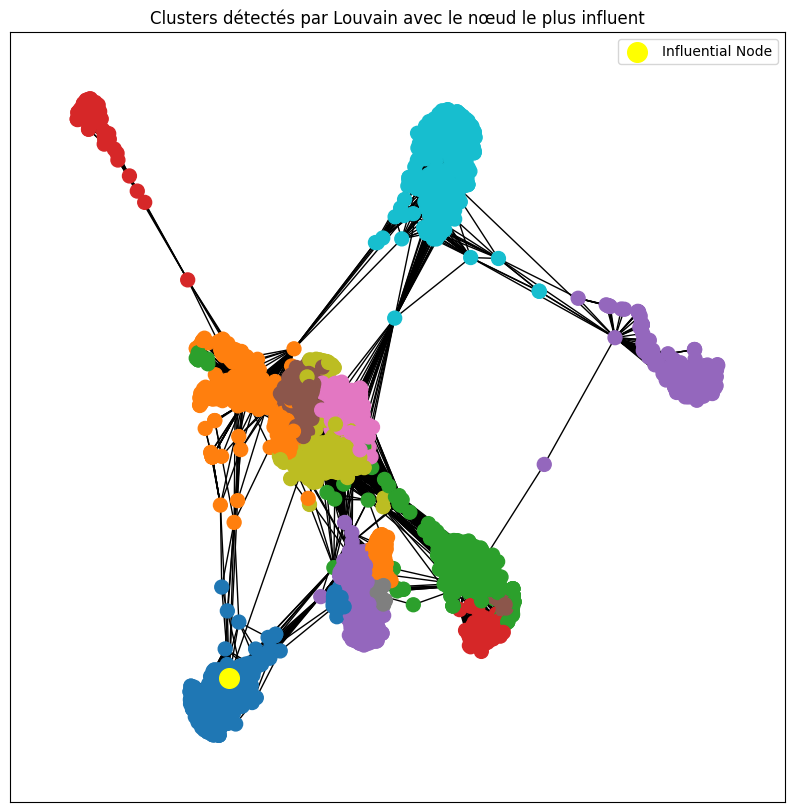

In [27]:
# Visualisation du sous-graphe avec des couleurs spécifiées pour Louvain
plt.figure(figsize=(10, 10))
pos_G_louvain = nx.spring_layout(G, seed=50, iterations=100)

# Dessiner les nœuds avec les couleurs spécifiées pour Louvain
node_colors_louvain = [louvain_cluster_colors[G.nodes[node]['louvain_cluster']] for node in G.nodes()]

# Dessiner tous les nœuds avec une taille de 100
nx.draw_networkx_nodes(G, pos_G_louvain, node_color=node_colors_louvain, node_size=100)

# Dessiner le nœud influent en rouge pour Louvain avec une taille de 200
nx.draw_networkx_nodes(G, pos_G_louvain, nodelist=[influential_node_louvain], node_color='yellow', node_size=200, label='Influential Node')

# Dessiner les arêtes du sous-graphe
nx.draw_networkx_edges(G, pos_G_louvain)


plt.title('Clusters détectés par Louvain avec le nœud le plus influent')
plt.legend()
plt.show()

#### APPLICATION DE LOUVAIN SUR UNE PARTIE DE DONNEES

In [28]:
# Application de l'algorithme Louvain
louvain_partition = community.best_partition(subgraph)

# Ajout des informations de clustering au sous-graphe pour Louvain
for node, cluster in louvain_partition.items():
    subgraph.nodes[node]['louvain_cluster'] = cluster

In [29]:
# Identification du nœud le plus influent après Louvain
influential_node_louvain = max(subgraph.nodes(), key=lambda node: subgraph.nodes[node].get('degree_centrality', 0))
print(f"Le nœud le plus influent pour Louvain est : {influential_node_louvain}")

Le nœud le plus influent pour Louvain est : 0


In [30]:

# Déterminer les clusters réellement présents dans les données Louvain
unique_louvain_clusters = set(subgraph.nodes[node]['louvain_cluster'] for node in subgraph.nodes())

# Définir dynamiquement les couleurs de clusters pour Louvain
louvain_cluster_colors = {cluster: f'C{l}' for l, cluster in enumerate(unique_louvain_clusters)}

# Afficher le nombre de clusters détectés par Louvain
num_louvain_clusters = len(unique_louvain_clusters)
print(f"Nombre de clusters détectés par Louvain : {num_louvain_clusters}")

Nombre de clusters détectés par Louvain : 7


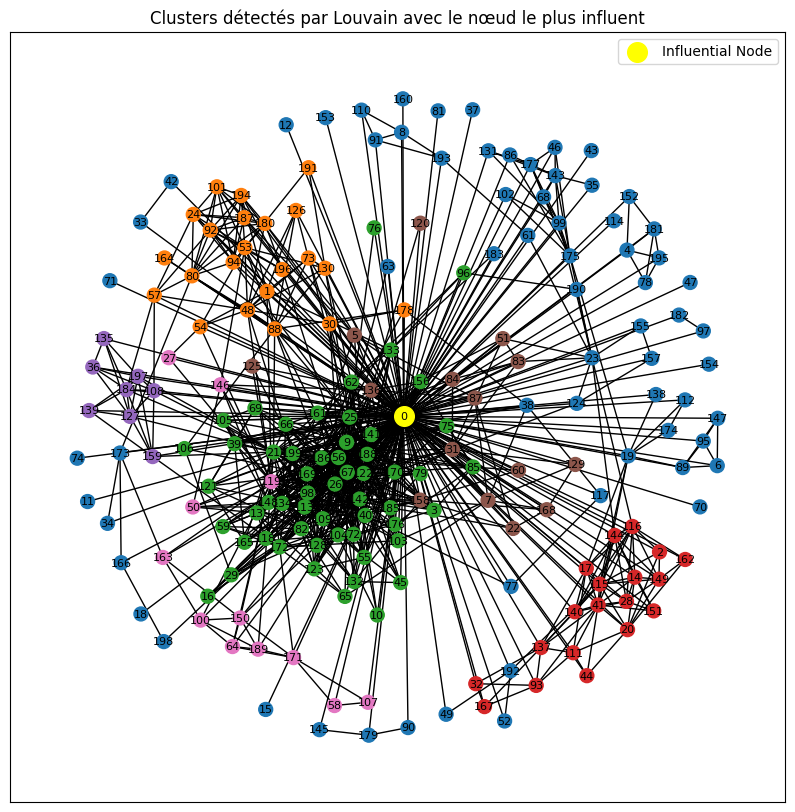

In [31]:
# Visualisation du sous-graphe avec des couleurs spécifiées pour Louvain
plt.figure(figsize=(10, 10))
pos_subgraph_louvain = nx.spring_layout(subgraph, seed=42, iterations=100)

# Dessiner les nœuds avec les couleurs spécifiées pour Louvain
node_colors_louvain = [louvain_cluster_colors[subgraph.nodes[node]['louvain_cluster']] for node in subgraph.nodes()]

# Dessiner tous les nœuds avec une taille de 100
nx.draw_networkx_nodes(subgraph, pos_subgraph_louvain, node_color=node_colors_louvain, node_size=100)

# Dessiner le nœud influent en rouge pour Louvain avec une taille de 200
nx.draw_networkx_nodes(subgraph, pos_subgraph_louvain, nodelist=[influential_node_louvain], node_color='yellow', node_size=200, label='Influential Node')

# Dessiner les arêtes du sous-graphe
nx.draw_networkx_edges(subgraph, pos_subgraph_louvain)

# Ajouter des étiquettes avec des numéros de nœuds pour Louvain
labels_louvain = {node: str(node) for node in subgraph.nodes()}
nx.draw_networkx_labels(subgraph, pos_subgraph_louvain, labels_louvain, font_size=8, font_color='black')

plt.title('Clusters détectés par Louvain avec le nœud le plus influent')
plt.legend()
plt.show()





In [32]:
silhouette_kmeans = silhouette_score(scaled_features, clusters)
print(f"Le coefficient de silhouette pour KMeans est : {silhouette_kmeans}")

# Calculer le coefficient de silhouette pour Louvain
silhouette_louvain = silhouette_score(scaled_features, node_colors_louvain)  # Utilisez les couleurs de Louvain
print(f"Le coefficient de silhouette pour Louvain est : {silhouette_louvain}")

Le coefficient de silhouette pour KMeans est : 0.6756361435266862
Le coefficient de silhouette pour Louvain est : -0.1862694424748662


In [33]:
# Calcul de la modularité pour KMeans
modularity_kmeans = community.modularity(kmeans_cluster_dict, subgraph)
print(f"La modularité pour KMeans est : {modularity_kmeans}")
modularity_louvain = community.modularity(louvain_partition, subgraph)
print(f"La modularité pour Louvain est : {modularity_louvain}")

La modularité pour KMeans est : 0.11828322405245485
La modularité pour Louvain est : 0.4577813460349843
